<a href="https://colab.research.google.com/github/Bhasker-Paul/Basic-Python/blob/main/Titanic__Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score



In [ ]:
df=pd.read_csv('/content/titanic_train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull() # Check the null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


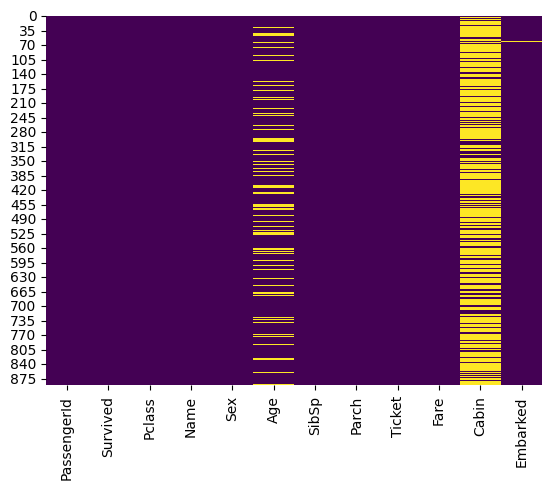

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis") # Check the null values by heatmap diagram
plt.show()

In [ ]:
df['Survived'] = df['Survived'].replace({0: 'Death', 1: 'Survived'})

<ipython-input-156-409ae787b665>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x="Survived", y=None, hue=None, data=df,palette="deep")


Text(0.5, 1.0, 'Survival Distribution')

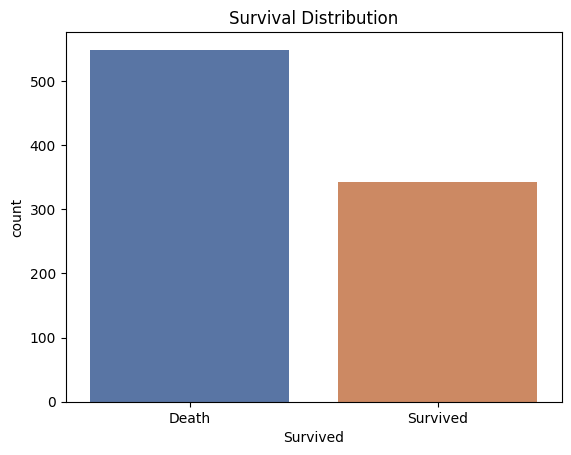

In [ ]:
sns.countplot( x="Survived", y=None, hue=None, data=df,palette="deep")
plt.title('Survival Distribution')

Text(0.5, 1.0, 'Survival by Gender')

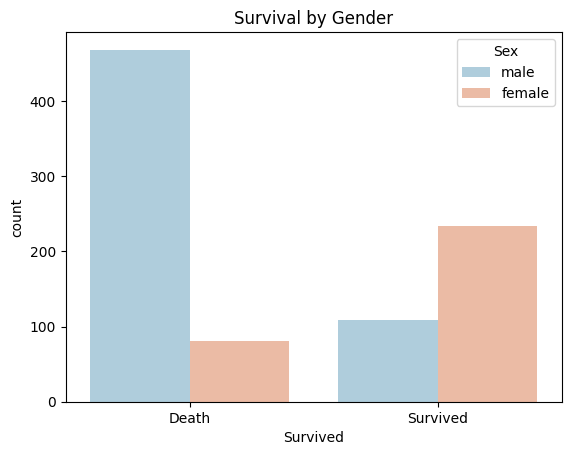

In [ ]:
sns.countplot( x="Survived", y=None, hue="Sex", data=df,palette="RdBu_r")
plt.title('Survival by Gender')

Text(0.5, 1.0, 'Survival by Passenger Class')

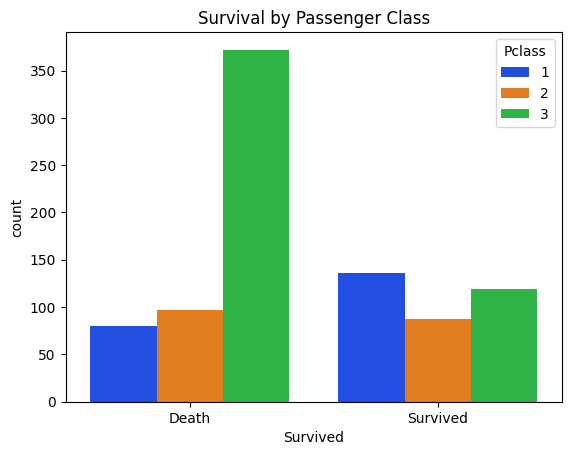

In [ ]:
sns.countplot( x="Survived", y=None, hue="Pclass", data=df,palette="bright")
plt.title('Survival by Passenger Class')

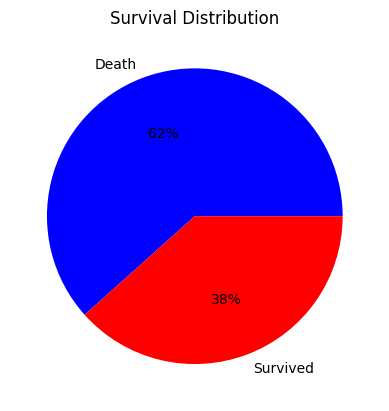

In [ ]:
survived_counts = df['Survived'].value_counts()
plt.pie(survived_counts, labels=survived_counts.index, colors='bright', autopct='%.0f%%')
plt.title('Survival Distribution') # Adds a descriptive title to the chart
plt.show()

<ipython-input-161-1a0f52230797>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x="Age",kde=False,palette='muted')


Text(0.5, 1.0, 'Age Distribution')

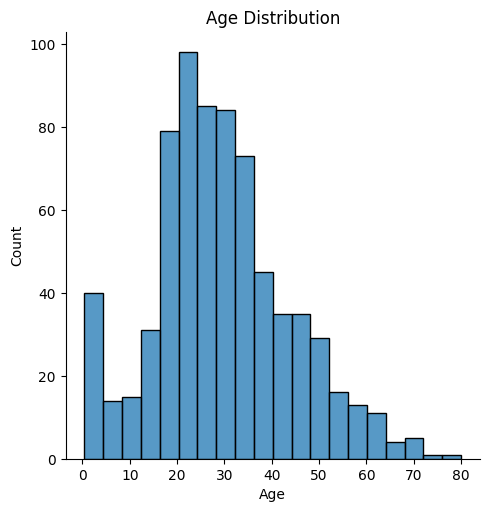

In [ ]:
sns.displot(data=df, x="Age",kde=False,palette='muted')
plt.title('Age Distribution')

<ipython-input-162-82205104858f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=df,palette='bright')


Text(0.5, 1.0, 'Number of Siblings/Spouses')

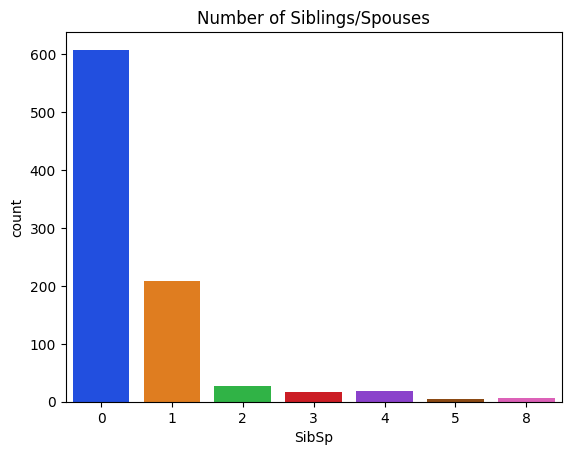

In [ ]:
sns.countplot(x='SibSp',data=df,palette='bright')
plt.title('Number of Siblings/Spouses')

Text(0.5, 1.0, 'Fare Distribution')

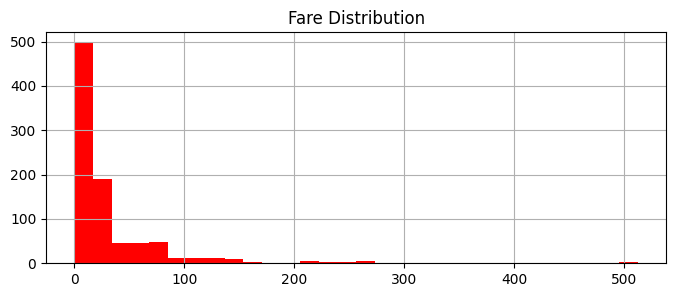

In [ ]:
df['Fare'].hist(color='red',bins=30,figsize=(8,3))
plt.title('Fare Distribution')

<ipython-input-164-b1be7ec69968>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age', data=df,palette='dark')


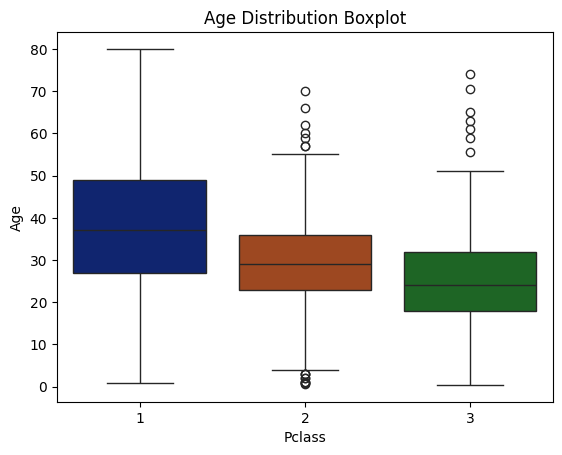

In [ ]:
sns.boxplot(x='Pclass',y='Age', data=df,palette='dark')
plt.title('Age Distribution Boxplot')
plt.show()

<ipython-input-166-606be495a3ea>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='dark')


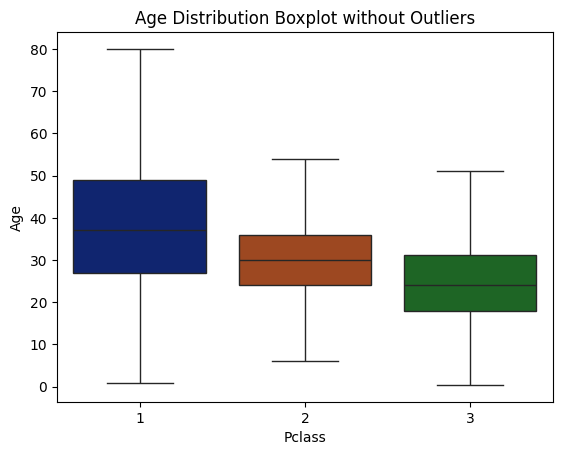

In [ ]:
def remove_outliers(group, column):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]

# Apply the function to remove outliers for 'Age' column within each 'Pclass' and overwrite the original DataFrame
df = df.groupby('Pclass').apply(lambda group: remove_outliers(group, 'Age')).reset_index(drop=True)

# Plot the boxplot with the filtered data
sns.boxplot(x='Pclass', y='Age', data=df, palette='dark')
plt.title('Age Distribution Boxplot without Outliers')
plt.show()

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)



In [ ]:
# Assuming df is already defined and loaded with data
X = df.iloc[:, 2:11].select_dtypes(include=['number'])  # Independent columns
y = df.iloc[:, 1]  # Target column i.e., price range

# Apply SelectKBest to extract the top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X, y)

# Get the selected feature names
selected_features = X.columns[bestfeatures.get_support()]

# Drop the unnecessary features from the original DataFrame
columns_to_keep = list(selected_features) + [df.columns[1]]  # Keep target column as well
df_reduced = df[columns_to_keep]

print(f"Selected Features: {selected_features}")
print(df_reduced.head())  # Display the first few rows of the new DataFrame

# Print the top 5 features with their scores for reference
featureScores = pd.DataFrame({
    'Specs': X.columns,
    'Score': fit.scores_
})
print(featureScores.nlargest(5, 'Score'))

Selected Features: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
   Pclass   Age  SibSp  Parch     Fare  Survived
0       1  38.0      1      0  71.2833  Survived
1       1  35.0      1      0  53.1000  Survived
2       1  54.0      0      0  51.8625     Death
3       1  58.0      0      0  26.5500  Survived
4       1  28.0      0      0  35.5000  Survived
    Specs        Score
4    Fare  4224.254918
0  Pclass    28.665718
3   Parch     5.847569
2   SibSp     1.329350
1     Age     1.164489


In [ ]:
df = df_reduced

# Display the DataFrame after dropping the unnecessary features
print(df.head())

   Pclass   Age  SibSp  Parch     Fare  Survived
0       1  38.0      1      0  71.2833  Survived
1       1  35.0      1      0  53.1000  Survived
2       1  54.0      0      0  51.8625     Death
3       1  58.0      0      0  26.5500  Survived
4       1  28.0      0      0  35.5000  Survived


<Axes: >

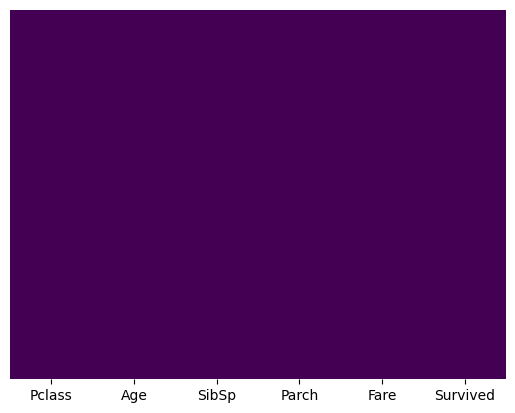

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

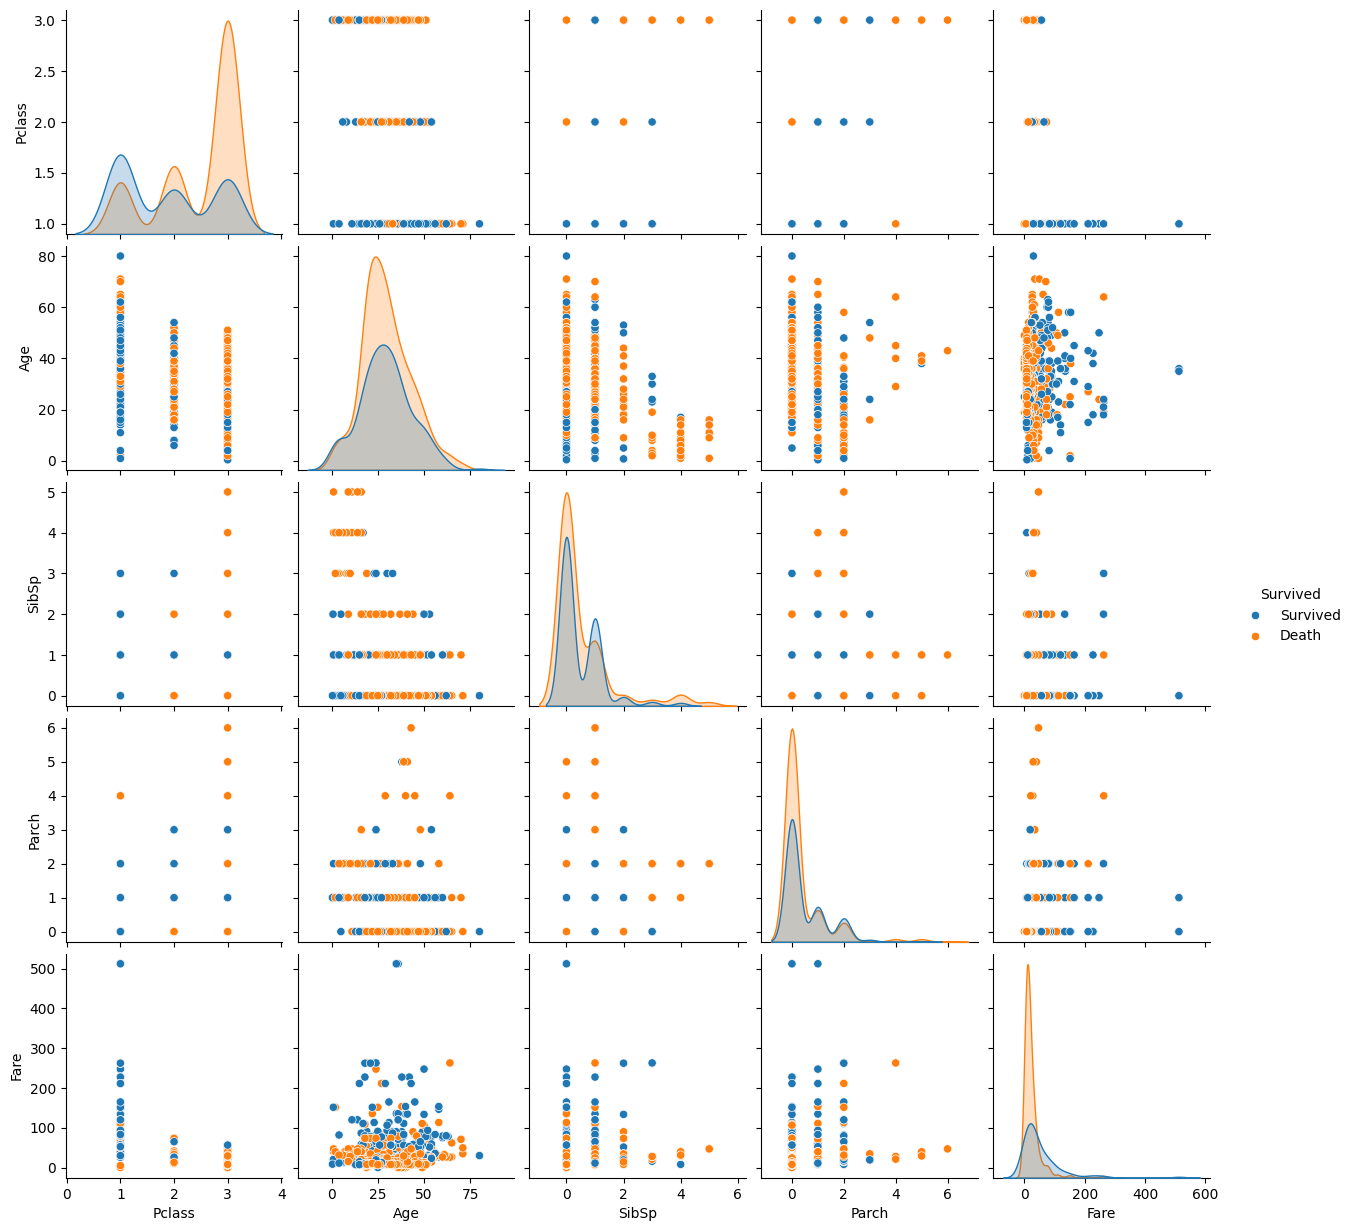

In [ ]:
sns.pairplot(df, hue="Survived")

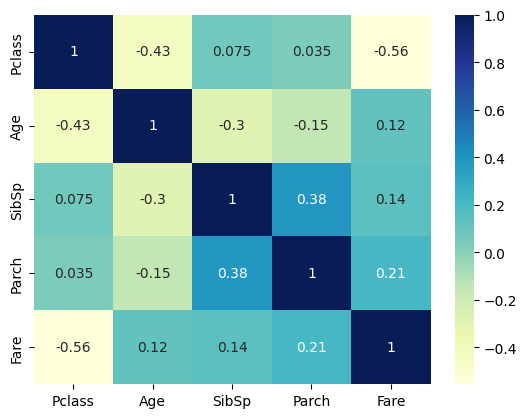

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
dataplot = sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)

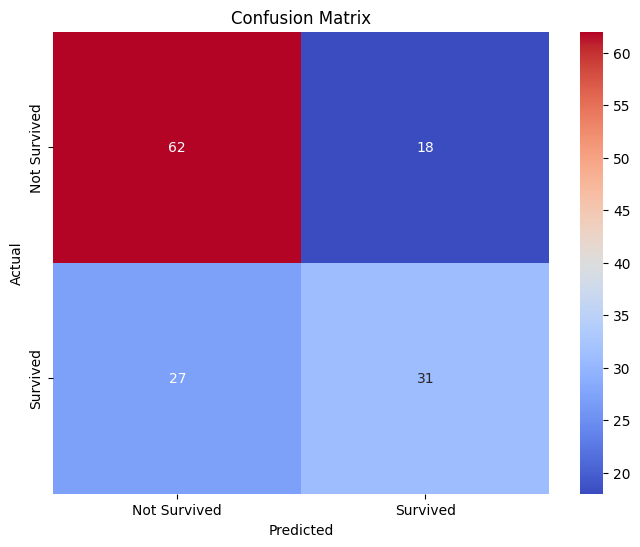

Classification Report:
               precision    recall  f1-score   support

       Death       0.70      0.78      0.73        80
    Survived       0.63      0.53      0.58        58

    accuracy                           0.67       138
   macro avg       0.66      0.65      0.66       138
weighted avg       0.67      0.67      0.67       138

Precision Score: 0.6326530612244898
Recal Score: 0.5344827586206896
Accuracy Score: 0.6739130434782609


In [ ]:
X = df[['Pclass','Age','SibSp','Parch','Fare']]  # Add other relevant features here
y = df['Survived']  # Assuming 'Survived' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn with a unique colormap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('Classification Report:\n',classification_report(y_test, y_pred))
print('Precision Score:',precision_score(y_test, y_pred,pos_label="Survived"))
print('Recal Score:',recall_score(y_test,y_pred,pos_label='Survived'))
print('Accuracy Score:',accuracy_score(y_test,
y_pred))


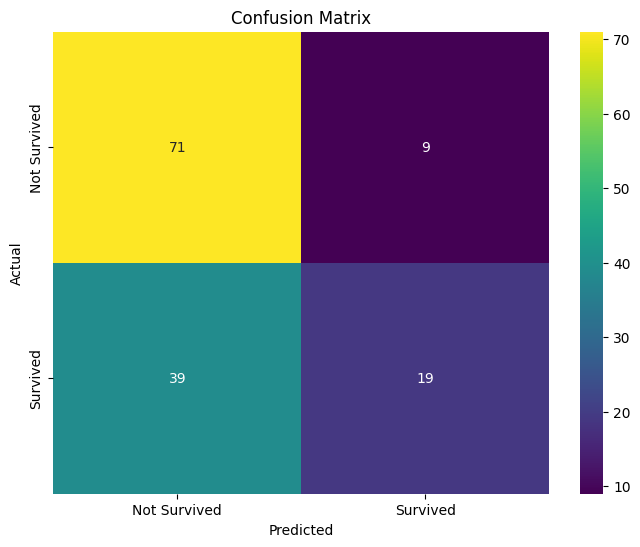

Classification Report:               precision    recall  f1-score   support

       Death       0.65      0.89      0.75        80
    Survived       0.68      0.33      0.44        58

    accuracy                           0.65       138
   macro avg       0.66      0.61      0.59       138
weighted avg       0.66      0.65      0.62       138

Precision Score: 0.6785714285714286
recall Score: 0.3275862068965517
Accuracy Score: 0.6521739130434783


In [ ]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train, y_train)

#calculate overall accuracy
y_pred = clf_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('Classification Report:',classification_report(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,pos_label='Survived'))
print('recall Score:',recall_score(y_test,y_pred,pos_label='Survived'))
print('Accuracy Score:',accuracy_score(y_test,y_pred))



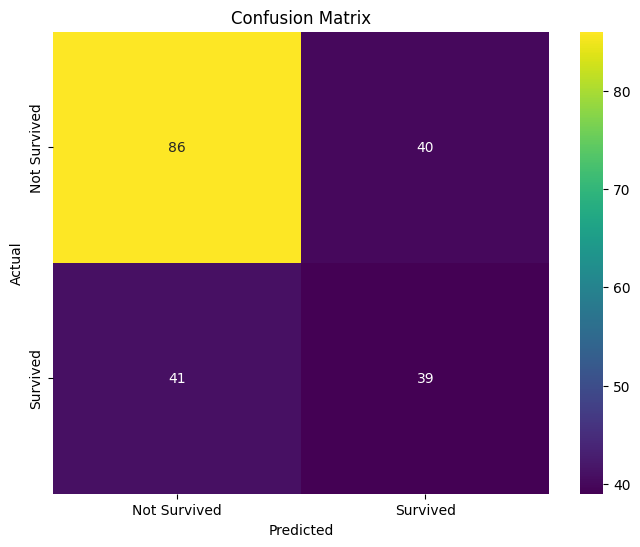

Classification Report:               precision    recall  f1-score   support

       Death       0.68      0.68      0.68       126
    Survived       0.49      0.49      0.49        80

    accuracy                           0.61       206
   macro avg       0.59      0.59      0.59       206
weighted avg       0.61      0.61      0.61       206

Precision Score: 0.4936708860759494
recall Score: 0.4875
Accuracy Score: 0.6067961165048543


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Compute Confusion Matrix
plt.figure(figsize=(8, 6))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('Classification Report:',classification_report(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,pos_label='Survived'))
print('recall Score:',recall_score(y_test,y_pred,pos_label='Survived'))
print('Accuracy Score:',accuracy_score(y_test,y_pred))




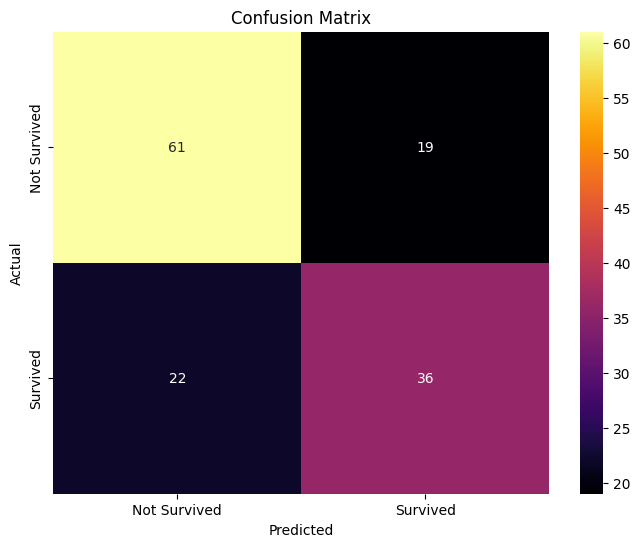

Classification Report:               precision    recall  f1-score   support

       Death       0.73      0.76      0.75        80
    Survived       0.65      0.62      0.64        58

    accuracy                           0.70       138
   macro avg       0.69      0.69      0.69       138
weighted avg       0.70      0.70      0.70       138

Precision Score: 0.6545454545454545
recall Score: 0.6206896551724138
Accuracy Score: 0.7028985507246377


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('Classification Report:',classification_report(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,pos_label='Survived'))
print('recall Score:',recall_score(y_test,y_pred,pos_label='Survived'))
print('Accuracy Score:',accuracy_score(y_test,y_pred))




In [ ]:

!pip install nbconvert

# Convert the notebook to HTML
!jupyter nbconvert --to html /content/your_notebook.ipynb

[NbConvertApp] WARNING | pattern '/content/your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--